<a href="https://colab.research.google.com/github/paulo-sapatera/Pinguins-Dataframe/blob/main/Projeto_Data_Science_Online_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

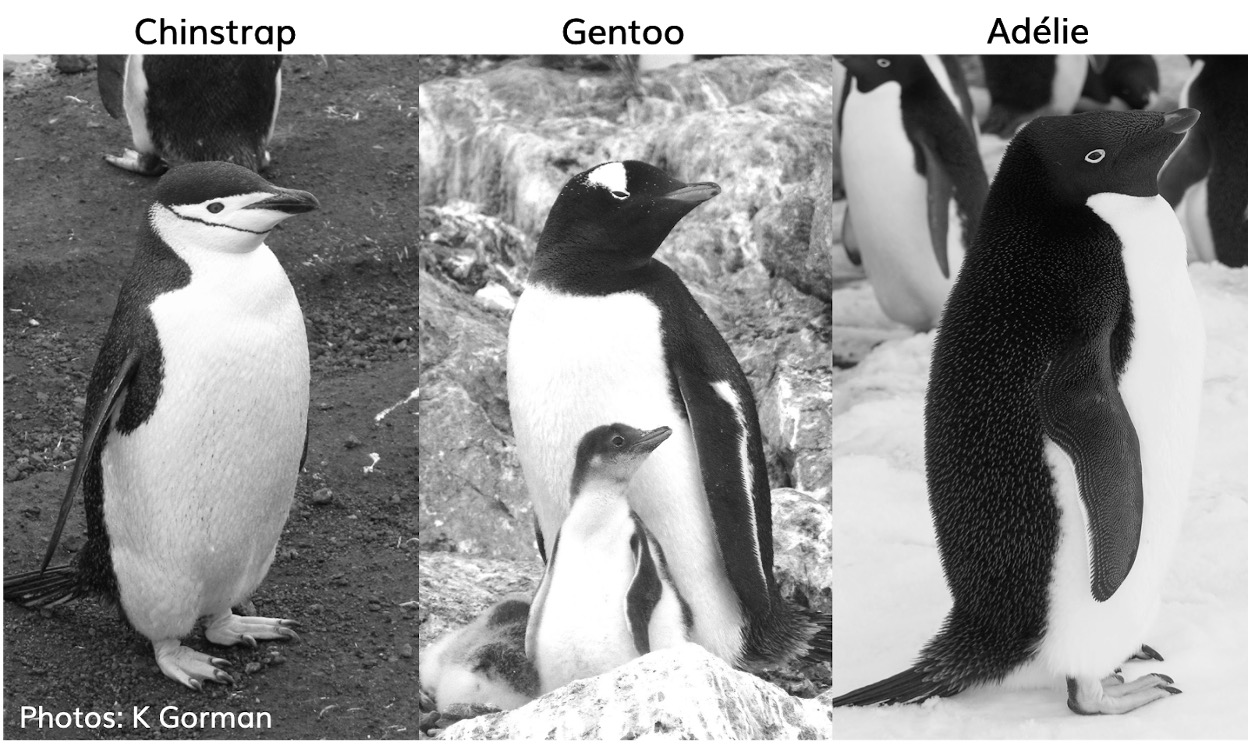

# Sumário

1.   **Introdução**
2.   **Resumo**
3.   **Instalando e Importando as bibliotecas necessárias**
4.   **Organizando o DataFrame e extraindo as primeiras informações**
5.   **Analisando Váriaveis**

  5.1   Espécies

  5.2   Ilhas

  5.3   Correlações

  5.4 Um pouco sobre as análises das váriaveis

6.   **Aplicando o Machine Learning**

    6.1   Treinando os Dados

    6.2   Utilizando o SVM
    
    6.3   Utilizando Arvore de Decisão

7.   **Conclusão**
8.   **Referências**


























# Introdução

O projeto é realizado em cima de um dataframe sobre pinguins, (link: https://github.com/LucasGabrielB/Desafio-Pinguins-Onlineapp) onde é feita a análise exploratória dos dados e por fim a aplicação de duas técnicas de  Machine Learning.

As ilhas estão localizadas no Arquipélago Palmer, também conhecido como Arquipélago Antártico, que é um grupo de ilhas ao largo da costa noroeste da Península Antártica.

No DataFrame temos 344 registros de pinguins onde temos informações da espécie, a ilha onde ele está localizado, o sexo dele, massa corporal, tamanho e profundidade da crista e o tamanho da nadadeira. Essas informações foram coletadas pela Dr. Kristen Gorman juntamente com o Palmer Station Antarctica LTER.

# Resumo

O projeto conta com a organização e visualização do DataFrame, pra saber quais dados temos e como eles estão sendo recebidos, depois disso é feita a análise exploratória, que com a ajuda de bibliotecas, podemos visualizar os dados em forma de gráficos, onde serão extraidas as informações necessárias para o estudo. E por ultimo será aplicada duas técnicas de Machine Learning, o SVM e a Arvore de Decisão.

# Instalando e Importando as bibliotecas necessárias

In [ ]:
!pip install folium;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importanto as bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import folium # importado pós instalação
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [ ]:
# importando o csv que será utilizado
df = pd.read_csv('https://raw.githubusercontent.com/LucasGabrielB/Desafio-Pinguins-Onlineapp/main/penguins_size.csv')

# visualizando o dataframe
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Organizando o DataFrame e extraindo as primeiras informações

In [ ]:
## alteração dos nomes das colunas
df.rename(columns={'species': 'Especies',
                     'island': 'Ilha',
                     'culmen_length_mm':'Tamanho_da_crista_mm',
                     'culmen_depth_mm':'Profundidade_da_crista_mm',
                     'flipper_length_mm':'Tamanho_da_nadadeira_mm',
                     'body_mass_g': 'Massa_corporal_g',
                     'sex':'Sexo'},inplace= True) # Inplace foi utilizado para manter o valor.

In [ ]:
# mostrando os 10 primeiros para ver a estrutura do dataframe
df.head(10)

,Especies,Ilha,Tamanho_da_crista_mm,Profundidade_da_crista_mm,Tamanho_da_nadadeira_mm,Massa_corporal_g,Sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [ ]:
# mostrando as informações das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Especies                   344 non-null    object 
 1   Ilha                       344 non-null    object 
 2   Tamanho_da_crista_mm       342 non-null    float64
 3   Profundidade_da_crista_mm  342 non-null    float64
 4   Tamanho_da_nadadeira_mm    342 non-null    float64
 5   Massa_corporal_g           342 non-null    float64
 6   Sexo                       334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.describe()

,Tamanho_da_crista_mm,Profundidade_da_crista_mm,Tamanho_da_nadadeira_mm,Massa_corporal_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Com o metodo describe podemos visualizar a **quantidade de valores**, a **média**, o **desvio padrão**, o **valor mínimo**, os **quartis da distribuição** e o **valor máximo**.

# Analisando váriaveis




## Espécies

### Quantidade de Pinguins por Espécie

In [ ]:
df = df[df['Sexo'] != '.'] # Tirando o pinguim que está com um '.' na coluna 'Sexo'

Text(0, 0.5, 'Quantidade de Pinguins')

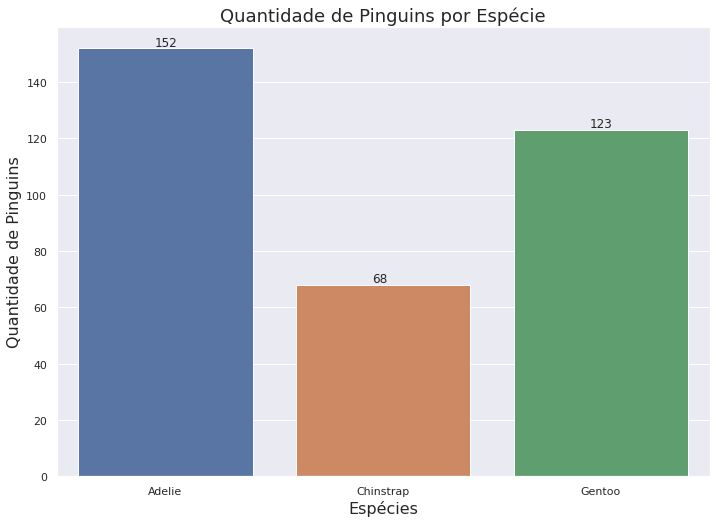

In [ ]:
sns.set_style('whitegrid') # Estilo do grafico
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Ajustando o tamanho do gráfico
label = 'Especies' # "Puxando" a coluna utilizada no gráfico 
ax = sns.countplot(x=label, data = df) # Chamando o sns e o dataframe
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.9)) #Alinha o número em cima da barra
plt.title('Quantidade de Pinguins por Espécie', size = 18) #Alterando título do gráfico
ax.set_xlabel( "Espécies" , size = 16  ) # Texto e tamanho da fonte do eixo x
ax.set_ylabel( "Quantidade de Pinguins" , size = 16 ) # Texto e tamanho da fonte do eixo y

Existem mais pinguins da espécie **Adelie** em nosso DataFrame, seguido por **Gentoo** e por ultimo **Chinstrap**.

### Quantidade de Pinguins por Sexo

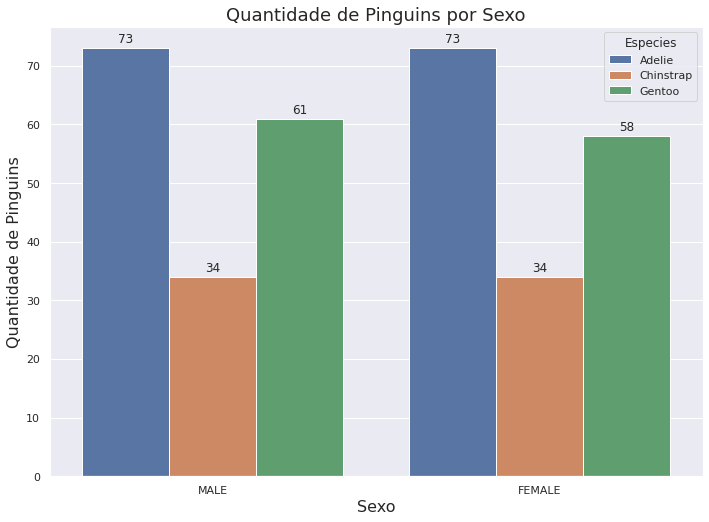

In [ ]:
ax = sns.countplot(x='Sexo', data = df, hue = 'Especies') #Chamando sns e o dataframe
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.110, p.get_height()+0.9))
plt.title('Quantidade de Pinguins por Sexo', size = 18) #Trocando o título do gráfico
ax.set_xlabel("Sexo" , size = 16  ) # Tamanho da label do eixo x 
ax.set_ylabel("Quantidade de Pinguins" , size = 16 ) # Tamanho da label do eixo y
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Ajustando o tamanho do gráfico

Os pinguins da espécie **Adelie** e da espécie **Chinstrap** tem o mesmo número de pinguins machos e pinguins fêmeas, já os **Gentoo** tem uma diferença pequena.

## Ilhas

### Mapa com localização das ilhas

In [ ]:
map_visual_ilhas = folium.Map(location=[-64.766667, -64.083333], zoom_start=6,width= 800, height = 600,
                           tiles="Stamen Terrain")

tooltip = "Click me!" #Mensagem do click

folium.Marker(
    [-64.766667, -64.083333], popup="<i>Mt. Hood Meadows</i>", tooltip=tooltip 
).add_to(map_visual_ilhas)
folium.Marker(
    [-64.766667, -64.083333], popup="<b>Ilha Torgersen</b> - 47 Pinguins", tooltip=tooltip
).add_to(map_visual_ilhas)
folium.Marker(
    [-66.125327, -66.711105], popup="<b>Ilha Biscoe</b> - 163 Pinguins", tooltip=tooltip
).add_to(map_visual_ilhas)
folium.Marker( 
    [-64.733431, -64.233339], popup="<b>Ilha Dream</b> - 123 Pinguins", tooltip=tooltip
).add_to(map_visual_ilhas)

map_visual_ilhas

Pode-se observar que as ilhas **Dream** e **Torgersen** são bem próximas, já a ilha **Biscoe** fica mais distante.

### Pinguins por Ilha

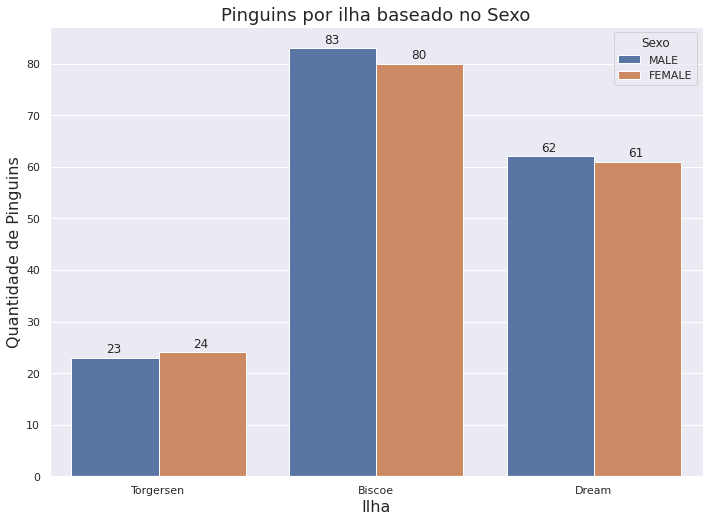

In [ ]:
ax = sns.countplot(x='Ilha', data = df, hue = 'Sexo') #Chamando sns e o dataframe
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.160, p.get_height()+0.9))
plt.title('Pinguins por ilha baseado no Sexo', size = 18) #Trocando o título do gráfico
ax.set_xlabel("Ilha" , size = 16  ) # Tamanho da label do eixo x 
ax.set_ylabel("Quantidade de Pinguins" , size = 16 ) # Tamanho da label do eixo y
sns.set(rc={'figure.figsize':(11.7,8.27)}) # Ajustando o tamanho do gráfico

A quantidade de Pinguins do sexo **masculino** e **feminino** é bem próxima em todas as ilhas.

### Espécies por Ilha

In [ ]:
fig = px.histogram(df, x="Ilha",
             color='Especies', barmode='group',
             height=600,
             width = 900,
             title = 'Espécies por Ilha',
             text_auto=True
             )
fig.show()

A espécie **Adelie** é a única presente em **todas** as ilhas, e também é a unica espécie presente na ilha Torgersen. Já a espécie **Gentoo**, só está presente na ilha Biscoe, e a **Chinstrap** só está presente na ilha Dream.

## Correlações

In [ ]:
fig = px.scatter_matrix(df,
    dimensions=["Tamanho_da_crista_mm",
                "Profundidade_da_crista_mm",
                "Tamanho_da_nadadeira_mm",
                "Massa_corporal_g"],
    color="Especies",
    height=970,  #Height pra aumentar o tamanho do grafico e não espremer as informações.
    title='Comparação Geral')
fig.update_traces(diagonal_visible=False)

fig.show()

Comparação geral entre **todas** as características.

### Massa Corporal x Tamanho da Nadadeira

In [ ]:
fig = px.scatter(df, x="Massa_corporal_g",
                 y="Tamanho_da_nadadeira_mm", 
                 color="Especies",
                 symbol="Especies",
                 title="Massa Corporal x Tamanho da Nadadeira") 
fig.show()

Os pinguins da espécie **Gentoo** tem tanto a nadadeira como a massa corporal maior que os da espécie **Adelie** e **Chinstrap**, que são parecidos nessas características. 

### Massa Corporal x Profundidade da Crista

In [ ]:
fig = px.scatter(df, x="Massa_corporal_g",
                 y="Profundidade_da_crista_mm",
                 color="Especies",
                 symbol="Especies" ,
                 title="Massa Corporal x Profundidade da Crista")
fig.show()

Os pinguins da espécie **Adelie** e **Chinstrap** tem a Profundidade da Crista bem maior que os da espécie **Gentoo**, porém os **Gentoo** tem mais massa corporal.

### Massa Corporal x Tamanho da Crista

In [ ]:
fig = px.scatter(df, x="Massa_corporal_g",
                 y="Tamanho_da_crista_mm",
                 color="Especies",
                 symbol="Especies",
                 title="Massa Corporal x Tamanho da Crista")
fig.show()

A massa corporal dos pinguins da espécie **Adelie** e **Chinstrap** tem quase a mesma medida, porém o Tamanho da Crista dos **Chinstrap** é maior, logo em seguida vem os Gentoo e por ultimo os da espécie **Adelie**.

### Tamanho da Crista x Profundidade da Crista

In [ ]:
fig = px.scatter(df, x="Tamanho_da_crista_mm",
                 y="Profundidade_da_crista_mm",
                 color="Especies",
                 symbol="Especies",
                 title="Tamanho da Crista x Profundidade da Crista")
fig.show()

O Tamanho da Crista dos pinguins das espécies **Gentoo** e **Chinstrap** é quase o mesmo, onde é maior que os da espécie **Adelie**. Já a Profundidade da Crista é parecida entre os **Adelie** e **Chinstrap**, e os **Gentoo** tem a profundidade menor.

## Um pouco sobre as análises das váriaveis

Em resumo, podemos ver que a ilha mais populosa é a Biscoe, seguido da Dream e por ultimo a Torgersen.

Existe quase o mesmo número de pinguins machos e fêmeas em todas as ilhas.

A ilha Torgersen tem pinguins somente da espécie Adelie, a ilha Biscoe tem Gentoo e Adelie, e a ilha Dream tem Chinstrap e Adelie.

Os pinguins da espécie Adelie estão em todas as ilhas e são bem parecidos na com os Chinstrap na maioria das caracteristicas. Os Chinstrap como já dito, são parecidos com os Adelie e só existem na ilha Dream. E por último os Gentoo, que são maiores que os outros e tem somente o tamanho da crista parecido com os Chinstrap e eles só populam a ilha Biscoe.

# Aplicando o Machine Learning

A intenção da aplicação do Machine Learning nesse projeto é para **prever** a espécie de pinguim.

## Treinando os Dados

In [ ]:
# Com essa função vamos remover os valores nulos do DataFrame e o inplace serve para manter essa alteração.
# o axis 0 serve pra avisar que estou estou trabalhando com as colunas.
df.dropna(axis=0, inplace=True)

In [ ]:
# Importando as bibliotecas necessárias para a realização do Machine Learning.
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Os dados estão sendo divididos para a realização dos testes e treinos.
train, test = train_test_split(df, test_size = 0.3, stratify= df['Especies'])

print(train.shape)
print(test.shape)

(233, 7)
(100, 7)


In [ ]:
# Definindo as colunas de teste e treino (são as utilizadas nas correlações)
train_X = train[['Tamanho_da_crista_mm','Profundidade_da_crista_mm','Tamanho_da_nadadeira_mm','Massa_corporal_g']]
train_Y = train.Especies

test_x = test[['Tamanho_da_crista_mm','Profundidade_da_crista_mm','Tamanho_da_nadadeira_mm','Massa_corporal_g']]
test_y = test.Especies

## Utilizando SVM (Support Vector Machine)

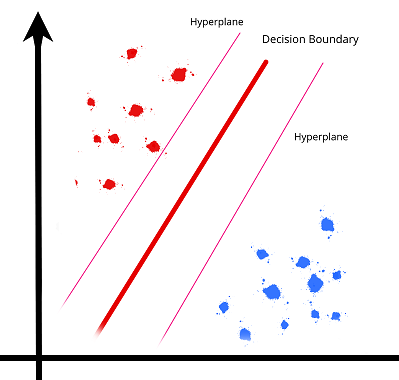

Usada para fazer classificação (definir o que são os dados).
Pensando em um gráfico por exemplo, ele traça uma reta para separar e você conseguir classificar e traça outras retas nas margens que servem de suporte (hiperplano).

In [ ]:
# Treinando os dados e alocando em uma váriavel
modelo_svm = svm.SVC()
modelo_svm.fit(train_X,train_Y);

In [ ]:
# Gerando rotulos com predição.
predicao_svm = modelo_svm.predict(test_x)

### Acurácia do SVM

In [ ]:
# Calculando a acurácia do modelo
acuracia= accuracy_score(y_true=test_y, y_pred=predicao_svm)
print('Acurácia do modelo:', acuracia * 100)

Acurácia do modelo: 69.0


A **acurácia** obtida por meio desse modelo não foi tão convincente. (quanto mais próxima de 100 melhor).

In [ ]:
#zero_division: Define o valor a ser retornado quando houver uma divisão zero
print('A precisão do SVM é:');
print(metrics.classification_report(test_y, predicao_svm, zero_division=1)); 

A precisão do SVM é:
              precision    recall  f1-score   support

      Adelie       0.61      0.91      0.73        44
   Chinstrap       1.00      0.00      0.00        20
      Gentoo       0.85      0.81      0.83        36

    accuracy                           0.69       100
   macro avg       0.82      0.57      0.52       100
weighted avg       0.77      0.69      0.62       100



A precisão da espécie **Chinstrap** não podê ser calculada.
Os **Gentoo** e os **Adelie** tem uma precisão muito boa, logo sabemos que os dados analisados foram classificados corretamente.

### Matriz de Confusão do SVM

In [ ]:
# Utilizando confusion_matrix
ConfusionMatrix=confusion_matrix(test_y,predicao_svm);
print(ConfusionMatrix);

[[40  0  4]
 [19  0  1]
 [ 7  0 29]]


In [ ]:
# Plotando a Matriz de Confusão
# o X marca a categoria PREVISTA e o Y a categoria REAL
fig = px.imshow(ConfusionMatrix, text_auto=True, title="Matriz de Confusão", color_continuous_scale='matter')
fig.show()

O modelo SVM, **não** consegue fazer a separação de forma que diferencie os Chinstrap dos Adelie, por ter características muito parecidas.

## Utilizando Arvore de Decisão

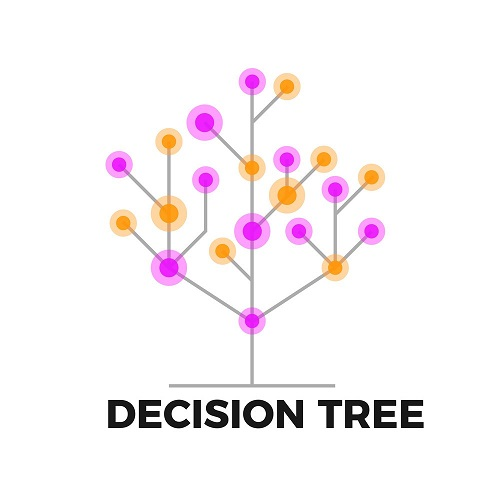

In [ ]:
# Chamando o algoritmo
modelo_arvore = DecisionTreeClassifier()

In [ ]:
#Treinando os dados
modelo_arvore.fit(train_X, train_Y)

DecisionTreeClassifier()

In [ ]:
# Utilizando a predição para gerar rótulos
predicao_arvore = modelo_arvore.predict(test_x)

### Acurácia da Arvore de Decisão

In [ ]:
# Calculando a acurácia
acuracia= accuracy_score(y_true=test_y, y_pred=predicao_arvore)
print('A acurácia desse modelo é:', acuracia * 100)

A acurácia desse modelo é: 98.0


In [ ]:
print('A precisão foi de:')
print(metrics.classification_report(test_y, predicao_arvore))

A precisão foi de:
              precision    recall  f1-score   support

      Adelie       1.00      0.95      0.98        44
   Chinstrap       0.91      1.00      0.95        20
      Gentoo       1.00      1.00      1.00        36

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



Esse modelo tem uma Acurácia melhor do que a do SVM.

### Matriz de Confusão da Arvore de Decisão

In [ ]:
# Utilizando confusion_matrix
ConfusionMatrix2=confusion_matrix(test_y,predicao_arvore);
print(ConfusionMatrix2);

[[42  2  0]
 [ 0 20  0]
 [ 0  0 36]]


In [ ]:
# Plotando a Matriz de Confusão
# o X marca a categoria PREVISTA e o Y a categoria REAL
fig = px.imshow(ConfusionMatrix2, text_auto=True, title="Matriz de Confusão", color_continuous_scale='RdPu')
fig.show()

### Importância das colunas no modelo

In [ ]:
pd.DataFrame(modelo_arvore.feature_importances_, index=train_X.columns, columns=["dados importantes"]).sort_values("dados importantes", ascending=False)

,dados importantes
Tamanho_da_nadadeira_mm,0.519609
Tamanho_da_crista_mm,0.386526
Profundidade_da_crista_mm,0.060120
Massa_corporal_g,0.033745


Utilizando o **feature_importances**, conseguimos visualizar qual foi a importancia de cada coluna para a criação da **Árvore de Decisão**.

# Conclusão

Segundo as análises no Dataframe, conseguimos tirar como informação que a ilha Biscoe é a mais populosa, não tem pinguins da espécie Chinstrap e é a unica que tem pinguins da especie Gentoo.
 
Já a ilha Torgersen é a que tem menos pinguins, e somente de uma espécie,que são os Adelie. E a Dream é a única que tem pinguins Chinstrap, e também tem os Adelie.

Na questão de sexo por ilha, os pinguins tem uma quantidade parecida em todas as ilhas, a diferença é de no
máximo 3 pinguins.

Na comparação das caracteristicas dos pinguins (correlação), os da espécie Gentoo são os maiores,
tem a maior massa corporal e a maior nadadeira, que no caso das outras duas espécies, essas duas características são bem parecidas.
O que diferencia bem os pinguins da espécie Adelie dos Chinstrap é o Tamanho da Crista, onde a dos Chinstrap é maior que a das duas outras espécies(a segunda maior é a dos Gentoo).

O Machine Learning foi aplicado de duas formas, uma funcionou bem e a outra não, pois a forma que é aplicado o modelo SVM não conseguiu separar as espécies Adelie e Chinstrap, que tem caracteristicas muito parecidas, já na Árvore de Decisão, obtivemos um resultado melhor, foi próximo ao 100, e conseguimos observar isso pela acurácia e lendo a Matriz de Confusão.

# Referências

*   Árvore de Decisão : https://www.youtube.com/watch?v=W7MfsE5av0c.
*   SVM : https://www.youtube.com/watch?v=bZ8ZUcV2b20&t=5s.
*   Python Pandas : https://cursos.alura.com.br/course/introducao-python-pandas.
*   Matriz de Confusão : https://www.youtube.com/watch?v=FMVXocEqvuA.



